# Libraries

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, models, datasets
from torchvision.models import ResNet18_Weights

# Prepare Data

In [11]:
image_folder = "archive"
data_transform = transforms.Compose([
    transforms.Resize((120, 120)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = datasets.ImageFolder(root=image_folder, transform=data_transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = random_split(dataset, [train_size, test_size])

batch_size = 8
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Model and Requeritments

In [21]:
num_classes = 6  
resnet_model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=0.0001)


# Train Function

In [19]:
def train(model, train_loader, test_loader, criterion, optimizer, epochs=5):

    train_losses = []
    test_losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = nn.functional.softmax(model(inputs), 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        model.eval()
        test_loss = 0.0
        correct = 0.0
        total = 0.0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_losses.append(test_loss / len(test_loader))
        accuracy = correct / total
        accuracies.append(accuracy)

        print(f'Epoch [{epoch + 1}/{epochs}], '
              f'Train Loss: {train_losses[-1]:.4f}, '
              f'Test Loss: {test_losses[-1]:.4f}, '
              f'Accuracy: {100 * accuracy:.2f}%')
    return train_losses, test_losses, accuracies

# Train the Model

In [22]:
EPOCH = 25
train_losses, test_losses, accuracies = train(resnet_model, train_loader, test_loader, criterion, optimizer, EPOCH)

Epoch [1/25], Train Loss: 1.4257, Test Loss: 0.4192, Accuracy: 90.00%
Epoch [2/25], Train Loss: 1.1726, Test Loss: 0.2236, Accuracy: 93.89%
Epoch [3/25], Train Loss: 1.1187, Test Loss: 0.2824, Accuracy: 92.78%
Epoch [4/25], Train Loss: 1.0882, Test Loss: 0.2212, Accuracy: 95.00%
Epoch [5/25], Train Loss: 1.0835, Test Loss: 0.1826, Accuracy: 95.00%
Epoch [6/25], Train Loss: 1.0895, Test Loss: 0.1484, Accuracy: 95.56%
Epoch [7/25], Train Loss: 1.0897, Test Loss: 0.1827, Accuracy: 95.56%
Epoch [8/25], Train Loss: 1.0749, Test Loss: 0.1771, Accuracy: 95.56%
Epoch [9/25], Train Loss: 1.0724, Test Loss: 0.1622, Accuracy: 95.56%
Epoch [10/25], Train Loss: 1.0759, Test Loss: 0.1825, Accuracy: 96.67%
Epoch [11/25], Train Loss: 1.0702, Test Loss: 0.1970, Accuracy: 95.00%
Epoch [12/25], Train Loss: 1.0672, Test Loss: 0.1651, Accuracy: 95.00%
Epoch [13/25], Train Loss: 1.0634, Test Loss: 0.1751, Accuracy: 96.11%
Epoch [14/25], Train Loss: 1.0709, Test Loss: 0.0714, Accuracy: 97.22%
Epoch [15/25], 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


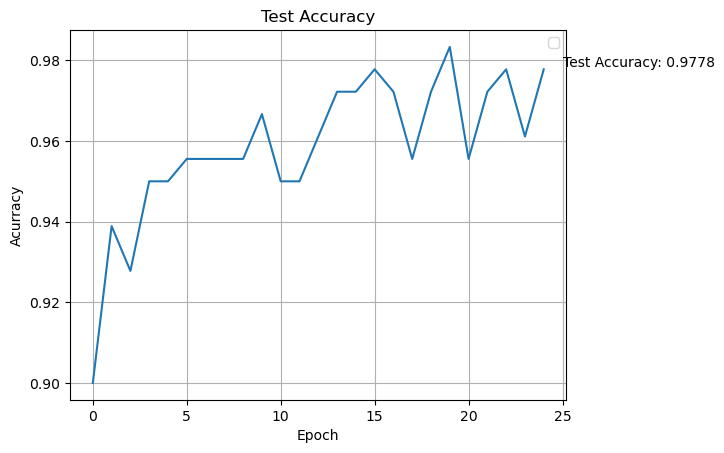

In [31]:
plt.plot(range(EPOCH), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Acurracy')
plt.title('Test Accuracy')
plt.grid()
plt.text(EPOCH, accuracies[-1], f'Test Accuracy: {accuracies[-1]:.4f}', ha='left', va='bottom')
plt.show()